In [1]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
# Load Model
g_model = load_model('Models/Pixel[02]_Context[08]/g_model_400.h5',custom_objects={'InstanceNormalization':InstanceNormalization})

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\Users\Lenovo\.conda\envs\Project\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


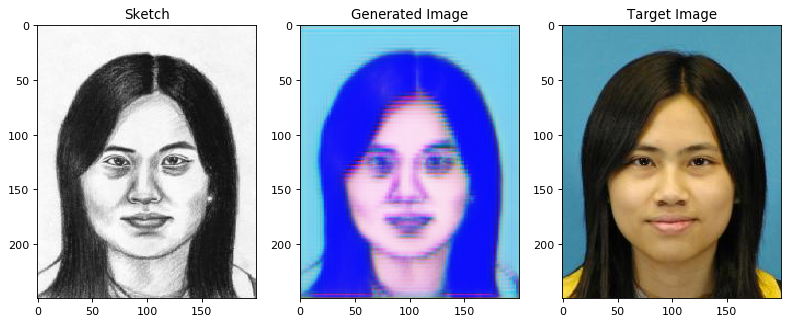

In [3]:
# load and resize the image
img = load_img('Dataset/CUHK/Testing sketch/f1-014-01-sz1.jpg', target_size=(256, 256))
target = cv2.cvtColor(cv2.imread('Dataset/CUHK/Testing photo/f1-014-01.jpg'), cv2.COLOR_BGR2RGB)

# convert to numpy array
img = img_to_array(img)
norm_img = (img.copy() - 127.5) / 127.5

g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = g_img * 127.5 + 127.5

img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(img.astype('uint8'))
ax2 = f.add_subplot(1,3, 2)
plt.imshow(g_img.astype('uint8'))
ax3 = f.add_subplot(1,3, 3)
plt.imshow(target.astype('uint8'))
ax1.set_title('Sketch')
ax2.set_title('Generated Image')
ax3.set_title('Target Image')

plt.show(block=True)